### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [80]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [81]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [82]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

In [83]:
data.passenger_count.isna().sum()

145864

In [84]:
data.distance_km.isna().sum()

145864

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [85]:
popular_category = data['passenger_count'].value_counts().index[0]
popular_category

930.3997532751514

In [86]:
data['passenger_count'] = data['passenger_count'].fillna(popular_category)

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [87]:
### Your code is 
grouped_means = data.groupby(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'])['distance_km'].transform('mean')
grouped_means

id
id2875421    3.466395
id2377394    3.463570
id3858529    3.183494
id3504673    3.468311
id2181028    3.466395
               ...   
id2376096    3.468311
id1049543    3.323767
id2304944    3.468311
id2714485    3.323767
id1209952    3.389926
Name: distance_km, Length: 1458644, dtype: float64

In [88]:
data['distance_km'] = data['distance_km'].fillna(grouped_means)

In [89]:
### Убедимся, что пропусков не осталось

### Your code is here
data['distance_km'].isna().sum()

0

In [90]:
data.head(20).to_csv('result.csv', sep=';', index=False)

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [91]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here
X = data.drop(['log_trip_duration'], axis = 1)
y = data.log_trip_duration
cross_val_error = []

for train_index, test_index in selector.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    cross_val_error.append(np.mean((model.predict(X_test)-Y_test)**2))

print(f"MSLE на Кросс-валидации: {np.round(cross_val_error, 3).mean()}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

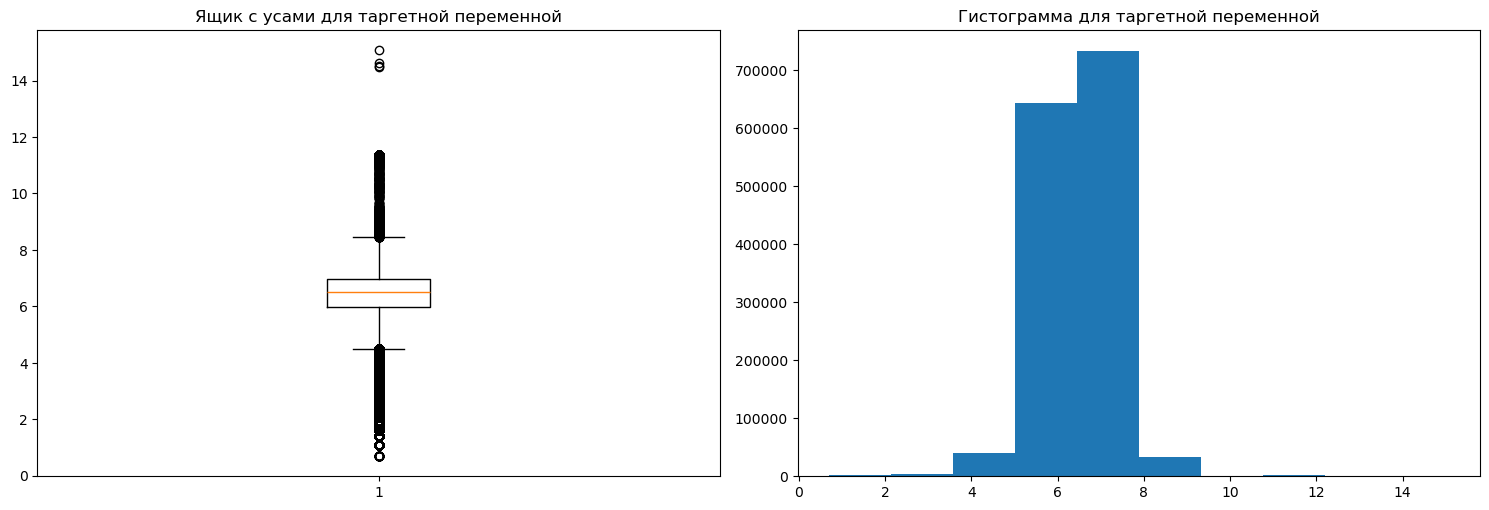

In [92]:
import matplotlib.pyplot as plt

### Your code is here
fig = plt.figure()

fig.set_size_inches(15, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.boxplot(data.log_trip_duration)

ax_2 = fig.add_subplot(1, 2, 2)
plt.hist(data.log_trip_duration)

fig.tight_layout()

ax_1.set(title = 'Ящик с усами для таргетной переменной')
ax_2.set(title = 'Гистограмма для таргетной переменной')

plt.show()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

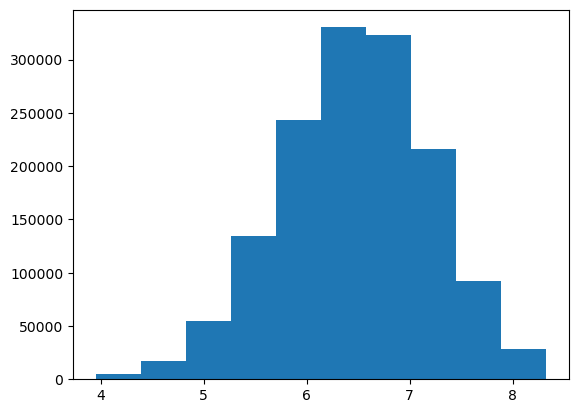

In [96]:
### Your code is here
lower_bound = np.percentile(data.log_trip_duration, 0.5)
upper_bound = np.percentile(data.log_trip_duration, 99.5)

data_cleaned = data[(data.log_trip_duration > lower_bound) & 
                    (data.log_trip_duration < upper_bound)]

plt.hist(data_cleaned.log_trip_duration)
plt.show()

Снова замерьте качество на кросс-валидации, используя старый selector

In [97]:
### Your code is here
X_2 = data_cleaned.drop(['log_trip_duration'], axis = 1)
y_2 = data_cleaned.log_trip_duration

cross_val_error_2 = []

for train_index, test_index in selector.split(X_2):
    X_train, X_test = X_2.values[train_index], X_2.values[test_index]
    Y_train, Y_test = y_2.values[train_index], y_2.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    cross_val_error_2.append(np.mean((model.predict(X_test)-Y_test)**2))

print(f"MSLE на Кросс-валидации: {np.round(np.mean(cross_val_error_2), 3)}")

MSLE на Кросс-валидации: 0.35
